In [1]:
#import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#input/store the voltage and current values and uncertainties for the resistor
Vo, Io, Vo_err, Io_err = np.loadtxt("PyLab 2 ohmeter.csv", skiprows = 1, delimiter = ',', unpack = True)

In [3]:
#input/store the voltage and current values and uncertainties for the potentiometer (hence 'p' in variable name)
Vp, Ip, Vp_err, Ip_err = np.loadtxt("PyLab 2 potentiometer.csv", skiprows = 1, delimiter = ',', unpack = True)

In [4]:
#define a linear function for the curve fit
def linear(m, x, b):
    return (m*x+b)

In [5]:
#store the optimal parameters of the data into array
p_opt_o, p_cov_o = curve_fit(linear, Vo, Io, sigma = Io_err, p0 = (0,0), absolute_sigma = True)

In [6]:
#store the optimal slope
m_opt_o = p_opt_o[0]
#store the optimal b value
b_opt_o = p_opt_o[1]
#calculate and store the errors for the m and b values
m_err_o = np.sqrt(np.diag(p_cov_o))[0]
b_err_o = np.sqrt(np.diag(p_cov_o))[1]

(2.1324675327444185, 0.03603749846732423)

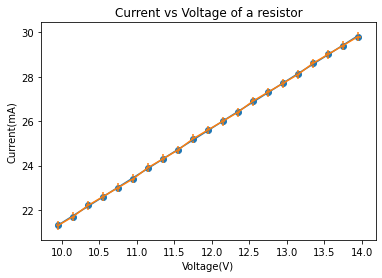

In [7]:
#plot the ohmeter data
plt.scatter(Vo, Io)
plt.plot(Vo, linear(Vo, m_opt_o, b_opt_o))
plt.errorbar(Vo, Io, xerr = Vo_err, yerr = Io_err)
plt.title("Current vs Voltage of a resistor")
plt.xlabel("Voltage(V)")
plt.ylabel("Current(mA)")

m_opt_o, m_err_o

In [8]:
#store the optimal parameters of the data into array
p_opt_p, p_cov_p = curve_fit(linear, Vp, Ip, sigma = Ip_err, p0 = (0,0), absolute_sigma = True)

#store the optimal slope/b values
m_opt_p = p_opt_p[0]
b_opt_p = p_opt_p[1]
#calulats the store the erros for the m and b values
m_err_p = np.sqrt(np.diag(p_cov_p))[0]
b_err_p = np.sqrt(np.diag(p_cov_p))[1]


Text(0, 0.5, 'Current(mA)')

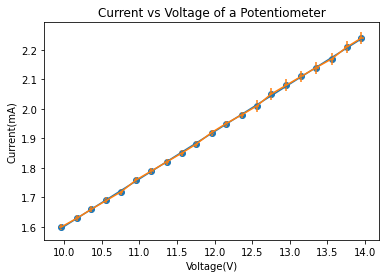

In [9]:
#plot the potentiometer data
plt.scatter(Vp, Ip)
plt.plot(Vp, linear(Vp, m_opt_p, b_opt_p))
plt.errorbar(Vp, Ip, xerr = Vp_err, yerr = Ip_err)
plt.title("Current vs Voltage of a Potentiometer")
plt.xlabel("Voltage(V)")
plt.ylabel("Current(mA)")

In [10]:
#Calculate, store and output the resistances for the ohmeter and potentiometer
Ro = 1/m_opt_p
Rp = 1/m_opt_o
print(Ro, "kΩ")
print(Rp, "kΩ")

6.220623132449045 kΩ
0.4689403166260785 kΩ


In [11]:
def chi(N, n, yi, xi, sigma_i, m, b):
    v = N-n
    f = linear(xi, m, b)
    chi = np.sum(((yi-f)**2)/sigma_i**2)
    chi = chi/v
    return chi

In [12]:
chi_o = chi(21, 2, Io, Vo, Io_err, m_opt_o, b_opt_o)
chi_o

0.023194349510138886

In [13]:
chi_p = chi(21, 2, Ip, Vp, Ip_err, m_opt_p, b_opt_p)
chi_p

0.06206189703074911